# Task 2: EDA

## Importing Libraries

In this step, we import important Python libraries needed for our analysis:

- `pandas` for handling dataframes and reading CSV files
- `missingno` for visualizing missing values
- `matplotlib.pyplot` and `seaborn` for creating data visualizations

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

Here, we load the dataset from the `data/` folder.  
We’re using the CSV version of the file for this analysis.

Make sure the file path is correct according to your folder structure.

In [3]:
df = pd.read_csv('../data/data.csv')

## Understanding Dataset Structure

We check:
- The number of rows and columns using `.shape`
- The column names using `.columns`
- Data types and missing value counts using `.info()`

This helps us understand the basic structure and format of the dataset.

In [4]:
print(df.shape)
print(df.columns)
df.info()

(95662, 16)
Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       

## Viewing the First Few Rows of Data

Using `.head()`, we display the first 5 rows of the dataset to quickly see what the data looks like.

In [5]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Summary Statistics for Numeric Columns

The `.describe()` function gives summary statistics (mean, min, max, etc.) for all numeric columns.

This helps us understand the range, average, and spread of the numerical features like `Amount` and `Value`.

In [6]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## Checking for Missing Values

We check for missing (NaN) values in each column using `.isnull().sum()`.

This helps us identify columns that may need imputation or cleaning later.

In [7]:
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

## Visualizing Distribution and Outliers in Amount

Here, we visualize the `Amount` column in two ways:

- **Histogram**: To see the overall distribution and check for skewness.
- **Boxplot**: To spot outliers (extremely high or low values) in the transaction amounts.

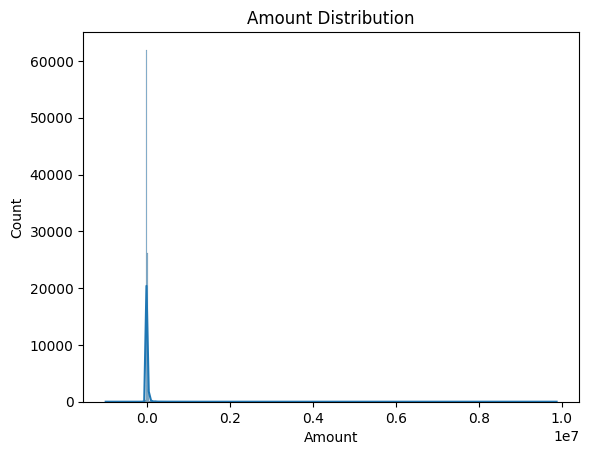

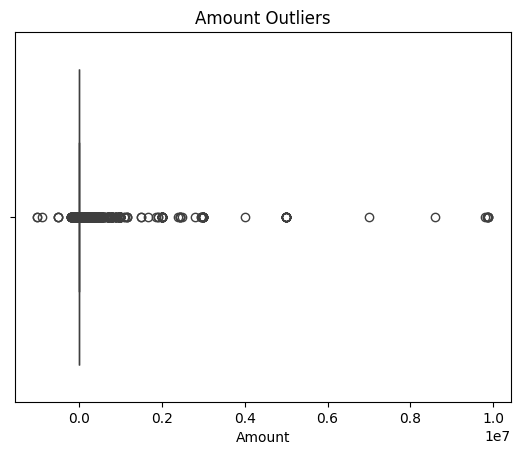

In [9]:
sns.histplot(df['Amount'], kde=True)
plt.title('Amount Distribution')
plt.show()

sns.boxplot(x=df['Amount'])
plt.title('Amount Outliers')
plt.show()

## Analyzing Distribution of Product Categories

We look at the frequency of each product category using `.value_counts()`.

Then, we use a **countplot** to visually show how many transactions fall under each product category (e.g., airtime, utility_bill, etc.).

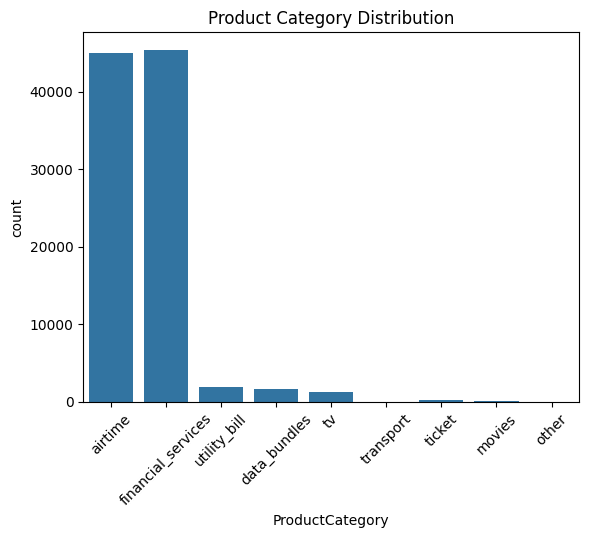

In [10]:
df['ProductCategory'].value_counts()

sns.countplot(x='ProductCategory', data=df)
plt.xticks(rotation=45)
plt.title('Product Category Distribution')
plt.show()

## Correlation Analysis Between Numeric Features

We focus on numeric columns only using `select_dtypes()`.  

Then we calculate the correlation matrix to see how strongly numeric features are related to each other.

Finally, we use a **heatmap** to visualize these relationships.

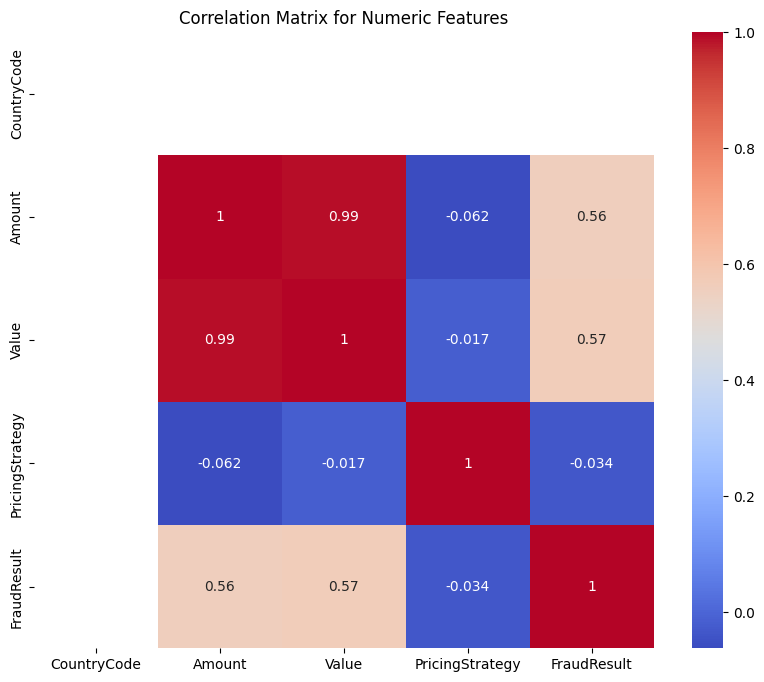

In [14]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

## Top EDA Insights Summary

1. The dataset contains X rows and Y columns with a mix of categorical and numeric features.
2. Some missing values exist in columns like `CountryCode` and `ProviderId`.
3. The `Amount` feature shows a skewed distribution with several outliers.
4. Most transactions fall under the `airtime` product category and `ChannelId_3`.
5. There is a strong positive correlation between `Amount` and `Value`.

In [2]:
import pandas as pd
from datetime import datetime
from src.proxy_target import calculate_rfm, scale_rfm, run_kmeans, analyze_clusters, label_high_risk_customers, merge_target_with_data

# Load your data
df = pd.read_csv('../data/data.csv')

# Step 1: Calculate RFM
snapshot_date = datetime(2020, 1, 1)  # Example snapshot date
rfm = calculate_rfm(df, snapshot_date)

# Step 2: Scale RFM
rfm_scaled = scale_rfm(rfm)

# Step 3: K-Means Clustering
clusters = run_kmeans(rfm_scaled)

# Step 4: Analyze cluster centers (optional, for deciding which is high risk)
print(analyze_clusters(rfm, clusters))

# Step 5: Decide high-risk cluster (e.g., cluster 0 or 1 based on summary)
high_risk_cluster_id = 0  # Example (You need to check from your summary)

# Step 6: Create target
target_df = label_high_risk_customers(rfm, high_risk_cluster_id)

# Step 7: Merge target with original data
final_df = merge_target_with_data(df, target_df)

# Save final processed dataset (for Task 5)
final_df.to_csv('../data/processed/data_with_target.csv', index=False)


ModuleNotFoundError: No module named 'src'